In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']

data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:56,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:57,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.679993,0.063,0.004,59.990002,43.0


In [5]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

# def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()



def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    # col이 문자열이거나 리스트인 경우 해당 열만 선택
    if isinstance(col, str):
        col = [col]

    if col is not None:
        # 입력된 col이 데이터프레임의 열에 없는 경우 오류 메시지 출력
        for c in col:
            if c not in data.columns:
                print(f"'{c}' 열이 데이터에 없습니다.")
                return

    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    if date is None:
        tmp = data[col]
    elif isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    else:
        tmp = data.loc[date, col].copy()

    for i, column in enumerate(tmp.columns):
        ax = plt.subplot(len(tmp.columns), 1, i + 1)
        plt.plot(tmp[column])
        highlight_break(ax, tmp)  # 이 함수는 원래 코드에 정의되어 있어야 합니다.

        plt.ylim(tmp[column].min(), tmp[column].max())
        mask = tmp['F_RunState'] == 2
        for x_position in tmp[mask].index:
            plt.axvline(x=x_position, color='r', alpha=0.1)
        plt.title(column)

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f'소요 시간 : {(end_time - start_time):.2f} 초')

In [52]:
from sklearn.preprocessing import StandardScaler

data['label'] = 0

train = data.loc['2023-06-06':'2023-06-09'].drop('label', axis=1)
test = data.loc['2023-06-25':'2023-06-28'].drop('label', axis=1)
y = data.loc['2023-06-25':'2023-06-28']['label']

std = StandardScaler()
train_sc = std.fit_transform(train)
test_sc = std.transform(test)

In [35]:
# 정상 데이터

mask1 = (data.index >= pd.Timestamp('2023-06-13 15:31:06')) & (data.index <= pd.Timestamp('2023-06-13 16:40:28'))
mask2 = (data.index >= pd.Timestamp('2023-06-14 02:24:35')) & (data.index <= pd.Timestamp('2023-06-14 03:32:12'))
mask3 = (data.index >= pd.Timestamp('2023-06-05 19:35:30')) & (data.index <= pd.Timestamp('2023-06-05 20:44:09'))
mask4 = (data.index >= pd.Timestamp('2023-06-16 09:21:54')) & (data.index <= pd.Timestamp('2023-06-16 10:29:53'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask5 = (data.index >= pd.Timestamp('2023-06-09 06:46:59')) & (data.index <= pd.Timestamp('2023-06-09 07:57:42'))
mask6 = (data.index >= pd.Timestamp('2023-06-28 02:51:01')) & (data.index <= pd.Timestamp('2023-06-28 04:03:40'))

mask7 = (data.index >= pd.Timestamp('2023-06-28 13:06:26')) & (data.index <= pd.Timestamp('2023-06-28 14:13:25'))
mask8 = (data.index >= pd.Timestamp('2023-06-28 20:26:31')) & (data.index <= pd.Timestamp('2023-06-28 21:31:51'))
mask8 = (data.index >= pd.Timestamp('2023-06-15 06:44:09')) & (data.index <= pd.Timestamp('2023-06-15 07:54:24'))
mask9 = (data.index >= pd.Timestamp('2023-06-15 09:09:55')) & (data.index <= pd.Timestamp('2023-06-15 10:19:56'))
mask10 = (data.index >= pd.Timestamp('2023-06-15 15:14:25')) & (data.index <= pd.Timestamp('2023-06-15 16:26:26'))
mask11 = (data.index >= pd.Timestamp('2023-06-16 21:08:05')) & (data.index <= pd.Timestamp('2023-06-16 22:21:35'))
mask12 = (data.index >= pd.Timestamp('2023-06-08 15:17:46')) & (data.index <= pd.Timestamp('2023-06-08 16:23:13'))
mask13 = (data.index >= pd.Timestamp('2023-06-21 07:26:50')) & (data.index <= pd.Timestamp('2023-06-21 08:33:53'))
mask14 = (data.index >= pd.Timestamp('2023-06-21 14:13:06')) & (data.index <= pd.Timestamp('2023-06-21 15:18:49'))
mask15 = (data.index >= pd.Timestamp('2023-06-21 03:27:31')) & (data.index <= pd.Timestamp('2023-06-21 04:34:53'))


# 두 마스크를 합침
combined_mask = mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8|mask9|mask10|mask11|mask12|mask13|mask14|mask15

selected_data = data[combined_mask]
selected_data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 19:35:30,1,0,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0
2023-06-05 19:35:31,1,1,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,217.419998,11.170,2.688,59.980000,43.0
2023-06-05 19:35:32,1,2,0.0,0.0,712.0,21.0,34.799999,30.900000,0.0,218.279999,12.793,2.840,59.980000,43.0
2023-06-05 19:35:33,1,3,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0
2023-06-05 19:35:34,1,4,0.0,0.0,712.0,21.0,34.700001,30.900000,0.0,217.619995,12.816,2.860,59.980000,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 14:13:21,2,10426,0.0,0.0,712.0,21.0,36.400002,38.700001,0.0,213.539993,10.777,2.528,59.990002,45.0
2023-06-28 14:13:22,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.389999,10.805,2.532,59.990002,45.0
2023-06-28 14:13:23,2,10426,0.0,0.0,712.0,21.0,36.500000,38.599998,0.0,213.470001,10.698,2.536,59.990002,45.0


In [53]:
# 이상 데이터

mask1 = (data.index >= pd.Timestamp('2023-06-22 18:57:44')) & (data.index <= pd.Timestamp('2023-06-22 19:08:12'))
mask2 = (data.index >= pd.Timestamp('2023-06-23 11:10:38')) & (data.index <= pd.Timestamp('2023-06-23 11:35:08'))
mask3 = (data.index >= pd.Timestamp('2023-06-23 14:08:55')) & (data.index <= pd.Timestamp('2023-06-23 14:20:50'))
mask4 = (data.index >= pd.Timestamp('2023-06-27 10:22:44')) & (data.index <= pd.Timestamp('2023-06-27 10:29:07'))
mask5 = (data.index >= pd.Timestamp('2023-06-29 11:11:21')) & (data.index <= pd.Timestamp('2023-06-29 11:20:20'))
mask6 = (data.index >= pd.Timestamp('2023-07-01 10:56:42')) & (data.index <= pd.Timestamp('2023-07-01 11:14:12'))

# 두 마스크를 합침
combined_mask = mask1 | mask2 | mask3 | mask4 | mask5 | mask6

data.loc[combined_mask, 'label'] = 1
anomaly = data[combined_mask]
anomaly_value = anomaly['label']
data.loc[combined_mask]

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,label
GDatetime,,,,,,,,,,,,,,,
2023-06-22 18:57:44,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,216.300003,12.878,2.800,60.000000,45.0,1
2023-06-22 18:57:45,2,2441,0.0,0.0,712.0,60.0,37.099998,32.400002,0.0,215.880005,12.864,2.828,60.000000,45.0,1
2023-06-22 18:57:46,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.550003,12.727,2.776,60.000000,45.0,1
2023-06-22 18:57:47,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
2023-06-22 18:57:48,2,2441,0.0,0.0,712.0,60.0,37.200001,32.400002,0.0,215.130005,12.786,2.796,60.000000,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 11:14:08,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:09,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.809998,12.664,2.768,60.009998,44.0,1
2023-07-01 11:14:10,4,26,0.0,0.0,704.0,51.0,35.799999,41.599998,0.0,218.669998,12.705,2.788,60.009998,44.0,1


In [33]:
data = data.dropna()

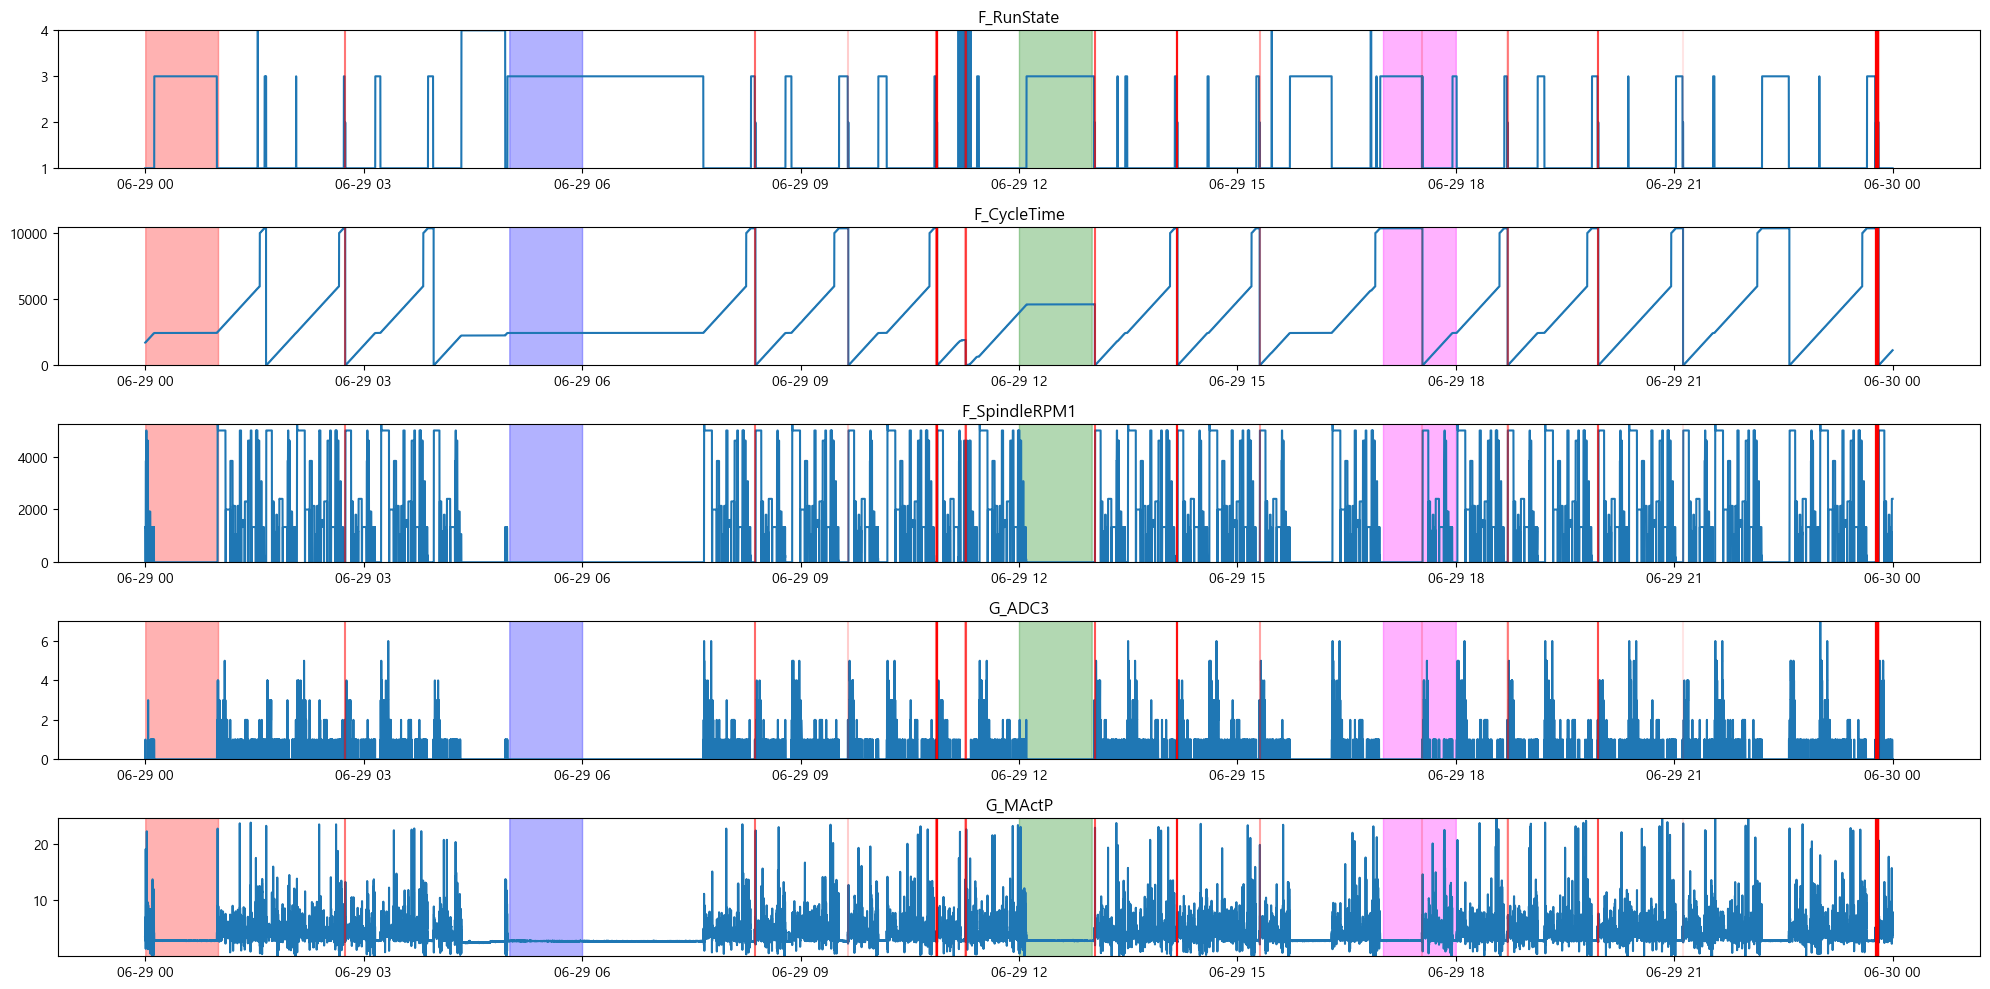

소요 시간 : 1.39 초


In [9]:
simple_plot(data, ('2023-06-29'), col=['F_RunState', 'F_CycleTime', 'F_SpindleRPM1', 'G_ADC3', 'G_MActP'])

In [88]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_sc = std.fit_transform(selected_data)
X_test = data.loc['2023-06-23':'2023-06-24'].drop('label', axis=1)
X_test_sc = std.transform(data.loc['2023-06-23':'2023-06-24'].drop('label', axis=1))
y_test = data.loc['2023-06-23':'2023-06-24']['label']

In [79]:
X_train_sc.shape, X_test_sc.shape, y_test.shape

((61423, 14), (171462, 14), (171462,))

In [43]:
from keras.layers import LeakyReLU, Dropout, ReLU, BatchNormalization, Dense, Input
from keras.models import Model
from keras import layers

n_features = X_train_sc.shape[1]
latent_dim = 4

# Encoder
enc_inputs = Input(shape=(n_features,))
x = Dense(128)(enc_inputs)
x = BatchNormalization()(x)  # Moved BatchNormalization before activation
x = ReLU()(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(8)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(4)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

enc_outputs = Dense(latent_dim)(x)

encoder = Model(inputs=enc_inputs, outputs=enc_outputs)

# Decoder
dec_inputs = Input(shape=(latent_dim,))
x = Dense(4)(dec_inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(8)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(16)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

dec_outputs = Dense(n_features, activation='linear')(x)  # Can be changed based on data range
decoder = Model(inputs=dec_inputs, outputs=dec_outputs)

# Autoencoder
inputs = Input(shape=(n_features,))
latent = encoder(inputs)
outputs = decoder(latent)

AE = Model(inputs=inputs, outputs=outputs)
AE.compile(optimizer='adam', loss='mse', metrics='acc')
AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14)]              0         
                                                                 
 model (Functional)          (None, 4)                 13984     
                                                                 
 model_1 (Functional)        (None, 14)                13994     
                                                                 
Total params: 27,978
Trainable params: 26,970
Non-trainable params: 1,008
_________________________________________________________________


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = AE.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=256, epochs=1000, callbacks=[early_stopping]) # 압축 후 복원하기 때문에, 자신과 비교

Epoch 1/1000
192/192 [==============================] - 5s 12ms/step - loss: 0.6125 - acc: 0.3769 - val_loss: 0.9319 - val_acc: 0.2222
Epoch 2/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.3941 - acc: 0.5119 - val_loss: 0.6900 - val_acc: 0.4252
Epoch 3/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.3462 - acc: 0.5569 - val_loss: 0.6723 - val_acc: 0.4395
Epoch 4/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.3219 - acc: 0.5670 - val_loss: 0.6360 - val_acc: 0.4383
Epoch 5/1000
192/192 [==============================] - 3s 13ms/step - loss: 0.2989 - acc: 0.5850 - val_loss: 0.6058 - val_acc: 0.4190
Epoch 6/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.2847 - acc: 0.5896 - val_loss: 0.5831 - val_acc: 0.4299
Epoch 7/1000
192/192 [==============================] - 2s 13ms/step - loss: 0.2755 - acc: 0.5929 - val_loss: 0.5642 - val_acc: 0.4344
Epoch 8/1000
192/192 [==============================] -

In [80]:
p_train = AE.predict(X_train_sc)
p_test = AE.predict(X_test_sc)
p_test.shape

5359/5359 [==============================] - 16s 3ms/step


(171462, 14)

In [87]:
AE.save('AE_clean_1.h5')

In [68]:
# # 재건에러
# def reconstruction_error(x, p):
#     return np.mean(np.abs(x - p), axis=1)

# rce = reconstruction_error(X_test_sc, p_test)

# rce_series = pd.Series(rce, index=y_test.index)

# # 중복된 인덱스 제거 (첫 번째 항목만 유지)
# rce_series = rce_series.loc[~rce_series.index.duplicated(keep='first')]
# y_test = y_test.loc[~y_test.index.duplicated(keep='first')]

# plt.figure()
# sns.histplot(x=rce_series, hue=y_test, bins=50, kde=True)
# plt.show()


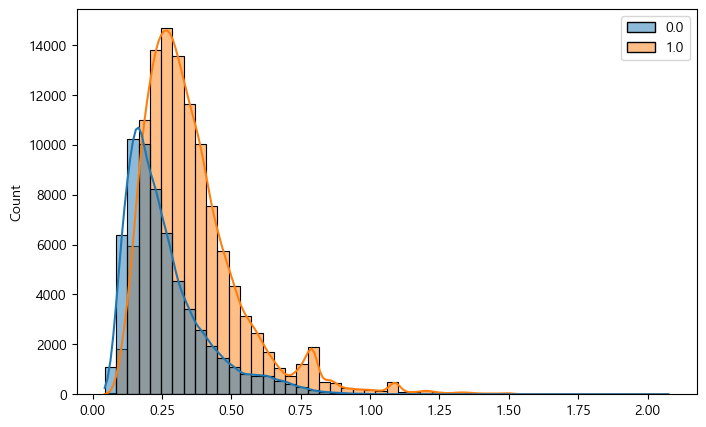

In [82]:
def reconstruction_error(x,p):
    return np.mean(np.abs(x - p), axis = 1)

re_normal = reconstruction_error(X_train_sc, p_train)
re_anormal = reconstruction_error(X_test_sc, p_test)

re_all = np.concatenate([re_normal, re_anormal])
label_all = np.concatenate([np.zeros_like(re_normal),
                            np.ones_like(re_anormal)])

plt.figure(figsize=(8,5))
sns.histplot(x=re_all, bins=50, hue=label_all, kde=True)
plt.show()

In [83]:
print(X_train_sc.shape, X_test_sc.shape, y_test.shape)
print(p_train.shape, p_test.shape)

(61423, 14) (171462, 14) (171462,)
(61423, 14) (171462, 14)


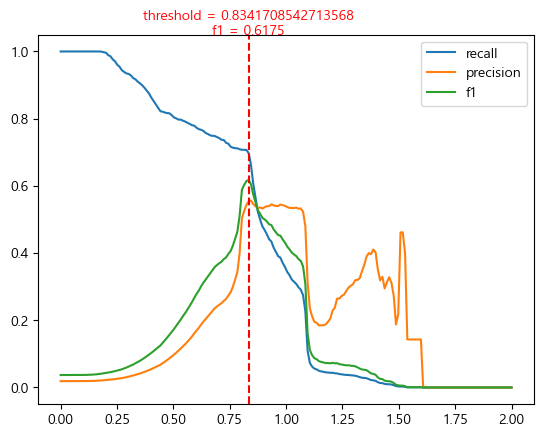

Train Accuracy  :  0.9570925336226103
f1 score        :  0.3037759061228353
Recall Score    :  0.7379310344827587
precision score :  0.19125357483317446
confusion matrix : ------------------
 [[162500   6787]
 [   570   1605]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    169287
           1       0.19      0.74      0.30      2175

    accuracy                           0.96    171462
   macro avg       0.59      0.85      0.64    171462
weighted avg       0.99      0.96      0.97    171462



<Figure size 640x480 with 0 Axes>

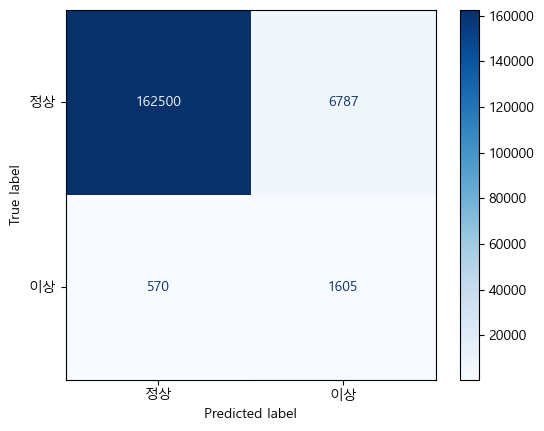

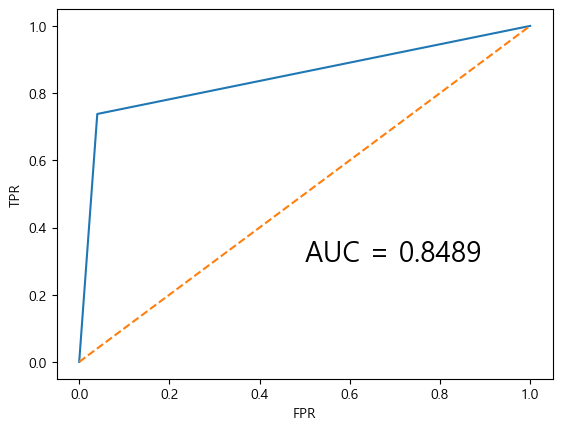

In [86]:
recall = []
precision = []
f1 = []

thresholds = np.linspace(0, 2, 200)
# thresholds = np.arange(0 1, 0.01)
for thres in thresholds:
    results = re_anormal > thres
    recall.append(recall_score(y_test, results))
    precision.append(precision_score(y_test, results))
    f1.append(f1_score(y_test, results))


plt.figure()
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, f1, label='f1')

plt.axvline(thresholds[np.argmax(f1)], color='red', linestyle='--')
plt.text(thresholds[np.argmax(f1)], 1.05, 'threshold = {}\nf1 = {:.4f}'.format(thresholds[np.argmax(f1)], np.max(f1)),
         color='red', horizontalalignment='center')

plt.legend()
plt.show()

# 오토인코더의 재구성 오차 계산
# reconstruction_errors = np.mean(np.square(X_test - AE.predict(X_test)), axis=1)
reconstruction_errors = np.mean(np.square(X_test_sc - p_test), axis=1)

# 이상치 여부 판단 (threshold 이상이면 이상치)
threshold = 0.834  # 임계치 설정

predicted_outliers = reconstruction_errors > threshold

# 검증 데이터의 실제 이상치 여부
actual_outliers = y_test

verification_test(actual_outliers, predicted_outliers)

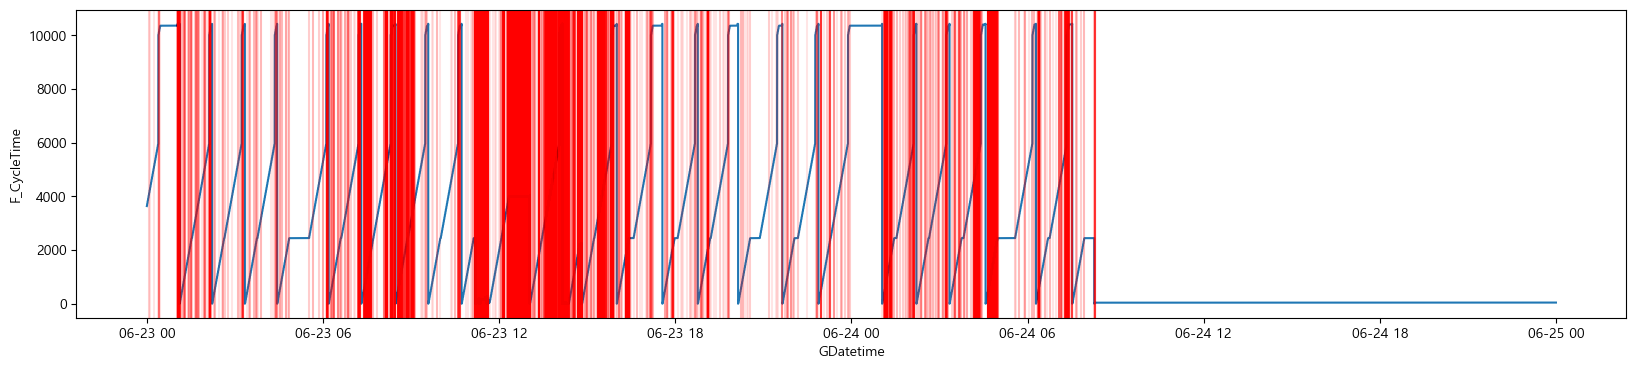

In [90]:
plt.figure(figsize=(20, 4))
sns.lineplot(X_test['F_CycleTime'])
for x_position in X_test[predicted_outliers == 1].index:
    plt.axvline(x=x_position, color='r', alpha=0.1)
plt.show()

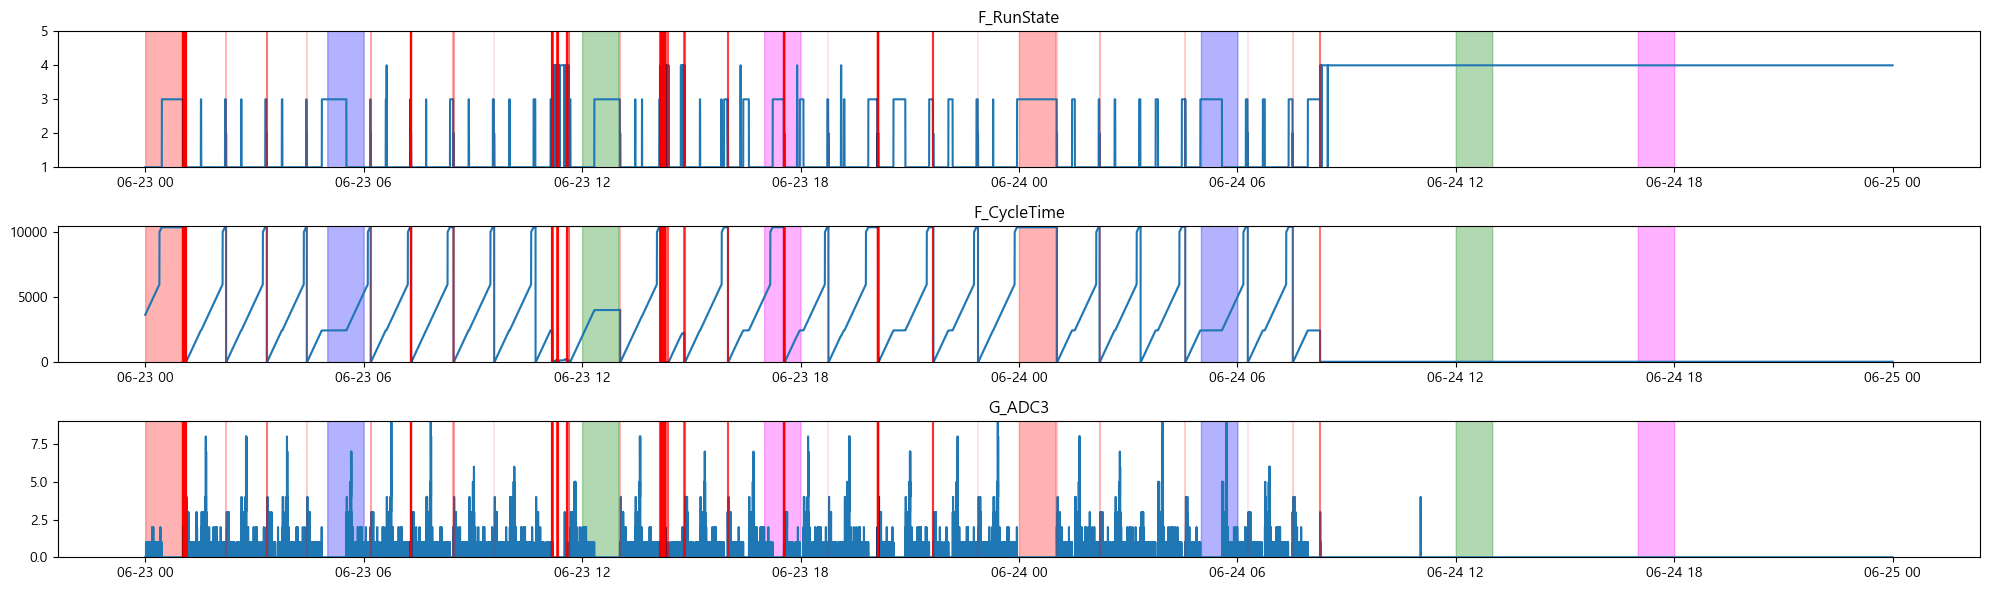

소요 시간 : 1.63 초


In [93]:
simple_plot(X_test, col=['F_RunState', 'F_CycleTime', 'G_ADC3'])